In [ ]:
def parse_input(input_data):
    """Parse the input data to extract positions and velocities."""
    robots = []
    for line in input_data.strip().split("\n"):
        pos_part, vel_part = line.split(" ")
        px, py = map(int, pos_part[2:].split(","))
        vx, vy = map(int, vel_part[2:].split(","))
        robots.append(((px, py), (vx, vy)))
    return robots

def simulate_motion(robots, width, height, time):
    """Simulate the motion of robots for the given time with wraparound."""
    final_positions = []
    for (px, py), (vx, vy) in robots:
        new_x = (px + time * vx) % width
        new_y = (py + time * vy) % height
        final_positions.append((new_x, new_y))
    return final_positions

def count_quadrants(positions, width, height):
    """Count the number of robots in each quadrant."""
    mid_x, mid_y = width // 2, height // 2
    quadrants = {"top_left": 0, "top_right": 0, "bottom_left": 0, "bottom_right": 0}

    for x, y in positions:
        if x == mid_x or y == mid_y:
            continue  # Ignore robots on the central lines
        if x < mid_x and y < mid_y:
            quadrants["top_left"] += 1
        elif x >= mid_x and y < mid_y:
            quadrants["top_right"] += 1
        elif x < mid_x and y >= mid_y:
            quadrants["bottom_left"] += 1
        elif x >= mid_x and y >= mid_y:
            quadrants["bottom_right"] += 1

    return quadrants

def calculate_safety_factor(quadrants):
    """Calculate the safety factor as the product of the counts in each quadrant."""
    return (quadrants["top_left"] * quadrants["top_right"] *
            quadrants["bottom_left"] * quadrants["bottom_right"])

def read_input_from_file(file_path):
    """Read input data from a file."""
    with open(file_path, 'r') as file:
        return file.read()

# Constants
WIDTH = 101
HEIGHT = 103
TIME = 100

# Main execution
file_path = "/content/drive/MyDrive/Personal Project/Advent of Code/2024/Day_14/input_14_12_2024.txt"  # Replace with your file path
input_data = read_input_from_file(file_path)
robots = parse_input(input_data)
final_positions = simulate_motion(robots, WIDTH, HEIGHT, TIME)
quadrants = count_quadrants(final_positions, WIDTH, HEIGHT)
safety_factor = calculate_safety_factor(quadrants)

print("Safety Factor:", safety_factor)


Safety Factor: 218619120


...............#.....#...............#.........................................#.....................
.........................#....................................#.................................#....
...................................................................#.................................
.......................................#.............................................................
...................................................................................................#.
..................#..................................................................................
.........................#...........................................................................
.....................................................................................................
.....................................................................................................
...........................................#..............#.......................

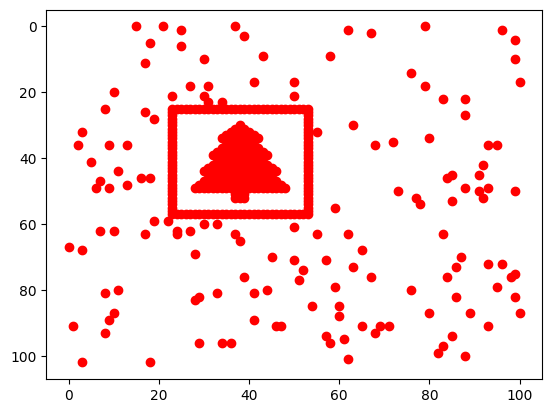

In [ ]:
import matplotlib.pyplot as plt

def parse_input(input_data):
    """Parse the input data to extract positions and velocities."""
    robots = []
    for line in input_data.strip().split("\n"):
        pos_part, vel_part = line.split(" ")
        px, py = map(int, pos_part[2:].split(","))
        vx, vy = map(int, vel_part[2:].split(","))
        robots.append(((px, py), (vx, vy)))
    return robots

def simulate_motion_step(robots):
    """Simulate one step of motion for the robots."""
    new_positions = []
    for (px, py), (vx, vy) in robots:
        new_x = (px + vx) % 101  # Wrap around the horizontal space (101 tiles)
        new_y = (py + vy) % 103  # Wrap around the vertical space (103 tiles)
        new_positions.append(((new_x, new_y), (vx, vy)))
    return new_positions

def get_bounding_box(positions):
    """Calculate the bounding box of the positions."""
    xs = [x for x, y in positions]
    ys = [y for x, y in positions]
    return min(xs), max(xs), min(ys), max(ys)

def render_positions(positions):
    """Render the positions on a grid for visualization."""
    min_x, max_x, min_y, max_y = get_bounding_box(positions)
    width = max_x - min_x + 1
    height = max_y - min_y + 1

    grid = [["." for _ in range(width)] for _ in range(height)]
    for x, y in positions:
        grid[y - min_y][x - min_x] = "#"

    return "\n".join("".join(row) for row in grid)

def find_positions_at_step(robots, step):
    """Find the positions of robots at a specific step."""
    for _ in range(step):
        robots = simulate_motion_step(robots)
    positions = [(px, py) for (px, py), _ in robots]
    return positions

def read_input_from_file(file_path):
    """Read input data from a file."""
    with open(file_path, 'r') as file:
        return file.read()

# Main execution
file_path = "/content/drive/MyDrive/Personal Project/Advent of Code/2024/Day_14/input_14_12_2024.txt"  # Replace with your file path
input_data = read_input_from_file(file_path)
robots = parse_input(input_data)

# Find positions at second 7055
positions_at_7055 = find_positions_at_step(robots, 7055)

# Render the positions and print the grid
rendered_grid = render_positions(positions_at_7055)
print(rendered_grid)

# Plot the positions on a grid using matplotlib
xs, ys = zip(*positions_at_7055)
plt.scatter(xs, ys, c='red', marker='o')
plt.gca().invert_yaxis()  # To match the grid coordinates
plt.show()


In [ ]:
import re
from dataclasses import dataclass

import numpy as np


@dataclass(slots=True)
class Robot:
    col: int
    row: int
    vcol: int
    vrow: int


def load_robots(filename):
    pattern = re.compile(r"-?\d+")
    with open(filename, "rt") as fin:
        nums = [int(m.group()) for m in re.finditer(pattern, fin.read())]
    return [Robot(*nums[i : i + 4]) for i in range(0, len(nums), 4)]


def move(robos, seconds, area_rows, area_cols):
    for r in robos:
        r.row = (r.row + r.vrow * seconds) % area_rows
        r.col = (r.col + r.vcol * seconds) % area_cols


def find_tree_second(robos, current_seconds, area_rows, area_cols):
    row_var_thres = np.var([r.row for r in robos]) * 0.5
    col_var_thres = np.var([r.col for r in robos]) * 0.5
    row_low_var, col_low_var = 0, 0

    # look for first second when variance is low (indicates clustered robots)
    while row_low_var == 0 or col_low_var == 0:
        current_seconds += 1
        move(robos, 1, area_rows, area_cols)
        if row_low_var == 0 and np.var([r.row for r in robos]) < row_var_thres:
            row_low_var = current_seconds % area_rows
        if col_low_var == 0 and np.var([r.col for r in robos]) < col_var_thres:
            col_low_var = current_seconds % area_cols

    # low row variance occurs every area_rows seconds
    # low col variance occurs every area_cols seconds
    # find second when both are low together, i.e. find x and y in this equation:
    # row_low_var + area_rows*x = col_low_var + area_cols*y

    # brute force solution
    x, y = 1, 1
    while True:
        left_side = row_low_var + area_rows * x
        right_side = col_low_var + area_cols * y
        if left_side == right_side:
            return left_side
        if left_side < right_side:
            x += 1
        else:
            y += 1


def safety_factor(robos, area_rows, area_cols):
    mid_row, mid_col = area_rows // 2, area_cols // 2
    quadrants = {(True, True): 0, (True, False): 0, (False, True): 0, (False, False): 0}

    for r in robos:
        if r.row == mid_row or r.col == mid_col:
            continue
        quadrants[r.row < mid_row, r.col < mid_col] += 1

    return (
        quadrants[True, True]
        * quadrants[True, False]
        * quadrants[False, True]
        * quadrants[False, False]
    )


def main():
    robos = load_robots("/content/drive/MyDrive/Personal Project/Advent of Code/2024/Day_14/input_14_12_2024.txt")
    area_rows, area_cols = 103, 101

    move(robos, 100, area_rows, area_cols)
    print(f"Part 1: {safety_factor(robos, area_rows, area_cols)}")
    print(f"Part 2: {find_tree_second(robos, 100, area_rows, area_cols)}")


if __name__ == "__main__":
    main()

Part 1: 218619120
Part 2: 7055
